Hello, World!


In [2]:
print("hello")

hello


In [9]:
import pandas as pd
import sklearn as sk
import numpy as np  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt




In [6]:
data = pd.read_csv("../data/data-set-for-SLR-2025.csv")

In [7]:
data.head()

,y,x
0,7.238462,0.025641
1,6.310256,0.051282
2,8.315385,0.076923
3,4.787179,0.102564
4,5.592308,0.128205


In [ ]:
#simple linear regression

model = LinearRegression()



(99, 2)

Shape: (99, 2)


,y,x
0,7.238462,0.025641
1,6.310256,0.051282
2,8.315385,0.076923
3,4.787179,0.102564
4,5.592308,0.128205


Using feature (X): y    target (y): x
X Shape : (99, 1)
y Shape : (99,)
Intercept: -0.663109
Coefficient: 0.150640
R2: 0.821326
MAE: 0.255449
RMSE: 0.309734


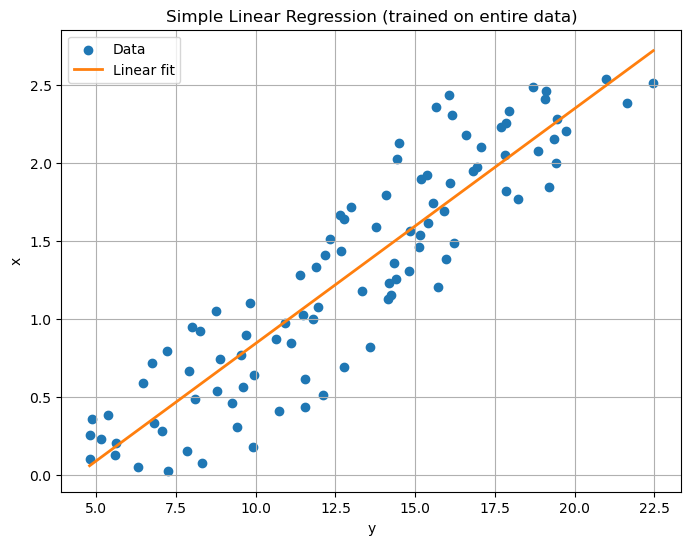

In [ ]:
# ...existing code...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# load data
data = pd.read_csv("../data/data-set-for-SLR-2025.csv")
print("Shape:", data.shape)
display(data.head())

# choose feature and target automatically (first two numeric columns)
num_cols = data.select_dtypes(include=[np.number]).columns.tolist()
if len(num_cols) < 2:
    raise ValueError("Need at least two numeric columns for SLR. Numeric columns found: " + str(num_cols))

X_col, y_col = num_cols[0], num_cols[1]
print("Using feature (X):", X_col, "   target (y):", y_col)

X = data[[X_col]].values  # ensure 2D
y = data[y_col].values

print("X Shape :", X.shape)
print("y Shape :", y.shape)
# train on entire data (as requested)
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# metrics
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"Intercept: {model.intercept_:.6f}")
print(f"Coefficient: {model.coef_[0]:.6f}")
print(f"R2: {r2:.6f}")
print(f"MAE: {mae:.6f}")
print(f"RMSE: {rmse:.6f}")

# plot data and fitted line
plt.figure(figsize=(8,6))
plt.scatter(X, y, label='Data', color='C0')
# regression line
X_range = np.linspace(X.min(), X.max(), 200).reshape(-1,1)
y_range = model.predict(X_range)
plt.plot(X_range, y_range, color='C1', linewidth=2, label='Linear fit')
plt.xlabel(X_col)
plt.ylabel(y_col)
plt.title('Simple Linear Regression (trained on entire data)')
plt.legend()
plt.grid(True)
plt.show()
# ...existing code...

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     445.9
Date:                Tue, 21 Oct 2025   Prob (F-statistic):           4.72e-38
Time:                        22:55:28   Log-Likelihood:                -24.443
No. Observations:                  99   AIC:                             52.89
Df Residuals:                      97   BIC:                             58.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6631      0.097     -6.812      0.0

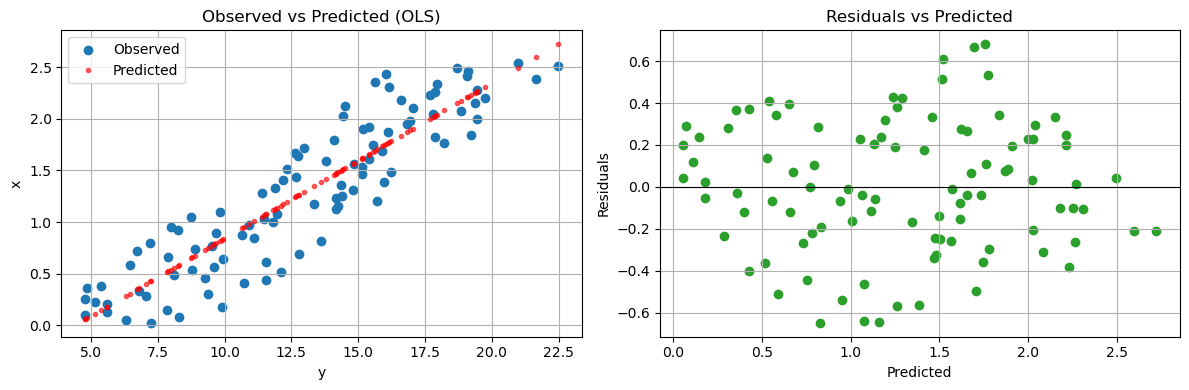

In [ ]:
# ...existing code...
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# prepare design matrix for statsmodels (adds intercept)
X_sm = sm.add_constant(X)   # X is (n,1) from earlier cell
ols_model = sm.OLS(y, X_sm).fit()

# print full OLS results
print(ols_model.summary())

# predictions and metrics (same metrics as sklearn)
y_pred_sm = ols_model.predict(X_sm)
r2_sm = r2_score(y, y_pred_sm)
mae_sm = mean_absolute_error(y, y_pred_sm)
rmse_sm = np.sqrt(mean_squared_error(y, y_pred_sm))

print(f"\nStatsmodels OLS metrics (trained on entire data):")
print(f"R2   : {r2_sm:.6f}")
print(f"MAE  : {mae_sm:.6f}")
print(f"RMSE : {rmse_sm:.6f}")

# quick diagnostic plots
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.scatter(X, y, label='Observed', color='C0')
plt.plot(X, y_pred_sm, 'r.', label='Predicted', alpha=0.6)
plt.xlabel(X_col); plt.ylabel(y_col)
plt.title('Observed vs Predicted (OLS)')
plt.legend(); plt.grid(True)

plt.subplot(1,2,2)
residuals = y - y_pred_sm
plt.scatter(y_pred_sm, residuals, color='C2')
plt.axhline(0, color='k', linewidth=0.8)
plt.xlabel('Predicted'); plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.grid(True)

plt.tight_layout()
plt.show()
